In [1]:
import os
import sys
import torch
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

# Add the project root to the path
sys.path.append('/Users/kerimbirgi/dev/topological-equivariant-networks')

# Import the processing functions
from preprocess.single_graph_processing_pdb import process_protein_pdb_ligand_style, process_ligand_sdf

/Users/kerimbirgi/miniconda3/envs/thesis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load and process the test data
protein_path = '/Users/kerimbirgi/dev/topological-equivariant-networks/test_data/pocket_6A.pdb'
ligand_path = '/Users/kerimbirgi/dev/topological-equivariant-networks/test_data/ligand.sdf'

print("Processing protein graph...")
protein_graph = process_protein_pdb_ligand_style(protein_path)
print(f"Protein graph: {protein_graph.num_nodes} nodes, {protein_graph.num_edges} edges")

print("Processing ligand graph...")
ligand_graph = process_ligand_sdf(ligand_path)
print(f"Ligand graph: {ligand_graph.num_nodes} nodes, {ligand_graph.num_edges} edges")


Processing protein graph...
Protein graph: 197 nodes, 350 edges
Processing ligand graph...
Ligand graph: 35 nodes, 72 edges


In [3]:
mpl.rcParams.update({
    "savefig.dpi": 300,       # raster exports
    "pdf.fonttype": 42,       # embed TrueType in PDF (editable in Illustrator)
    "ps.fonttype": 42,
    "svg.fonttype": "none",   # keep text as text in SVG
    "font.size": 9,           # adjust to your thesis template
    "axes.titlesize": 9,    
    "axes.labelsize": 9,
    "legend.fontsize": 8,
})

Creating combined visualization...


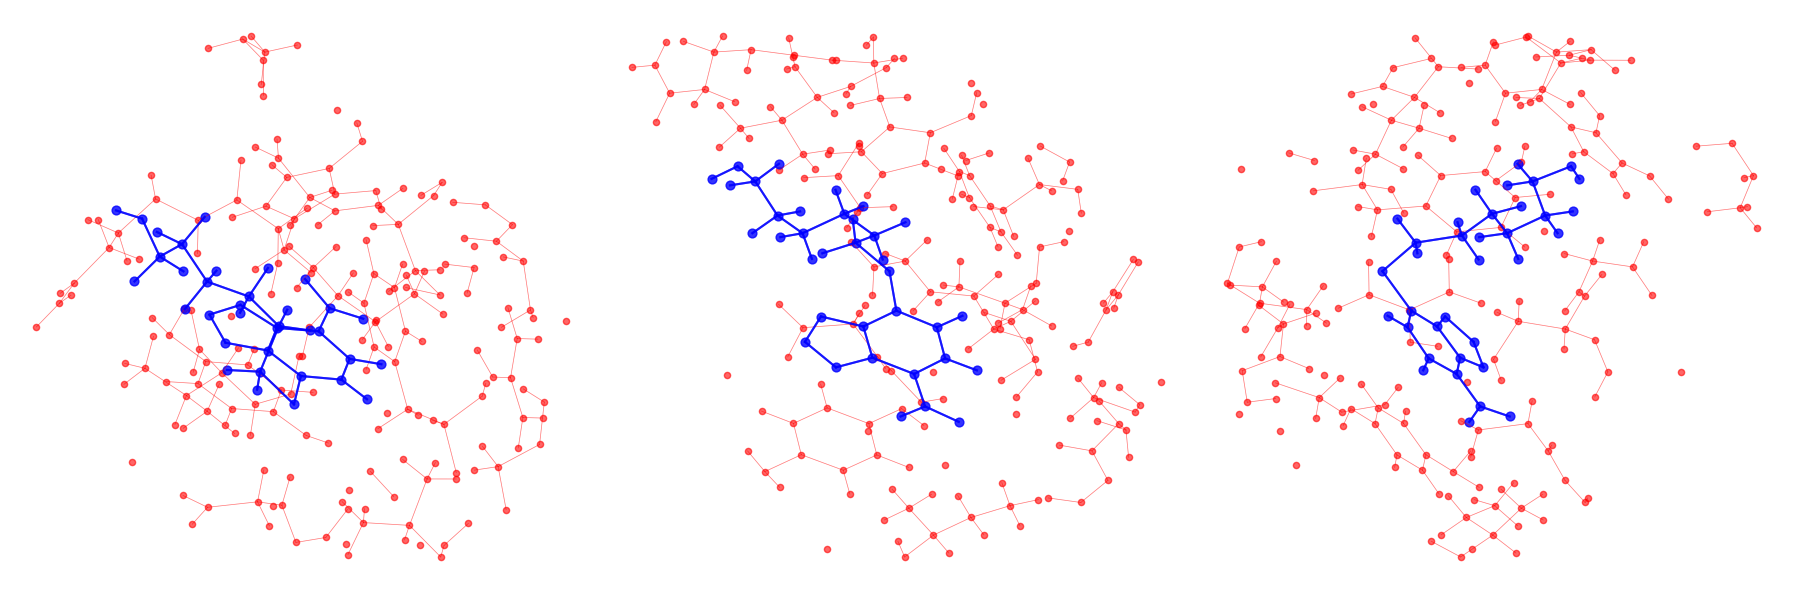

In [ ]:
# Combined visualization
def plot_combined_graphs(protein_graph, ligand_graph, title="Protein-Ligand Complex"):
    """Plot both protein and ligand graphs together"""
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6)) #figsize=(6.3, 2.6)
    
    # Get positions
    prot_pos = protein_graph.pos.numpy()
    lig_pos = ligand_graph.pos.numpy()
    
    # Plot protein edges
    prot_edge_index = protein_graph.edge_index.numpy()
    for i in range(prot_edge_index.shape[1]):
        start, end = prot_edge_index[:, i]
        ax1.plot([prot_pos[start, 0], prot_pos[end, 0]], 
                [prot_pos[start, 1], prot_pos[end, 1]], 
                'r-', alpha=0.3, linewidth=0.5)
        ax2.plot([prot_pos[start, 0], prot_pos[end, 0]], 
                [prot_pos[start, 2], prot_pos[end, 2]], 
                'r-', alpha=0.3, linewidth=0.5)
        ax3.plot([prot_pos[start, 1], prot_pos[end, 1]], 
                [prot_pos[start, 2], prot_pos[end, 2]], 
                'r-', alpha=0.3, linewidth=0.5)
    
    # Plot ligand edges
    lig_edge_index = ligand_graph.edge_index.numpy()
    for i in range(lig_edge_index.shape[1]):
        start, end = lig_edge_index[:, i]
        ax1.plot([lig_pos[start, 0], lig_pos[end, 0]], 
                [lig_pos[start, 1], lig_pos[end, 1]], 
                'b-', alpha=0.7, linewidth=1.5)
        ax2.plot([lig_pos[start, 0], lig_pos[end, 0]], 
                [lig_pos[start, 2], lig_pos[end, 2]], 
                'b-', alpha=0.7, linewidth=1.5)
        ax3.plot([lig_pos[start, 1], lig_pos[end, 1]], 
                [lig_pos[start, 2], lig_pos[end, 2]], 
                'b-', alpha=0.7, linewidth=1.5)
    
    # Plot nodes
    ax1.scatter(prot_pos[:, 0], prot_pos[:, 1], c='red', s=20, alpha=0.6, label='Protein')
    ax1.scatter(lig_pos[:, 0], lig_pos[:, 1], c='blue', s=40, alpha=0.8, label='Ligand')
    
    ax2.scatter(prot_pos[:, 0], prot_pos[:, 2], c='red', s=20, alpha=0.6, label='Protein')
    ax2.scatter(lig_pos[:, 0], lig_pos[:, 2], c='blue', s=40, alpha=0.8, label='Ligand')
    
    ax3.scatter(prot_pos[:, 1], prot_pos[:, 2], c='red', s=20, alpha=0.6, label='Protein')
    ax3.scatter(lig_pos[:, 1], lig_pos[:, 2], c='blue', s=40, alpha=0.8, label='Ligand')
    
    # Labels and titles
    #ax1.set_xlabel('X')
    #ax1.set_ylabel('Y')
    #ax1.set_title(f'XY projection')
    #ax1.legend()
    
    #ax2.set_xlabel('X')
    #ax2.set_ylabel('Z')
    #ax2.set_title(f'XZ projection')
    #ax2.legend()
    
    #ax3.set_xlabel('Y')
    #ax3.set_ylabel('Z')
    #ax3.set_title(f'YZ projection')
    #ax3.legend()
    
    for ax in (ax1, ax2, ax3):
        ax.set_xticks([])
        ax.set_yticks([])
        ax.tick_params(bottom=False, left=False)   # removes tick marks too
        for spine in ax.spines.values():           # optional: hide the box
                spine.set_visible(False)
    plt.tight_layout()
    #plt.show()
    fig.savefig("graph_example_etnn.png", dpi=300, bbox_inches="tight", facecolor="white")
    

print("Creating combined visualization...")
plot_combined_graphs(protein_graph, ligand_graph)


Creating combined visualization...


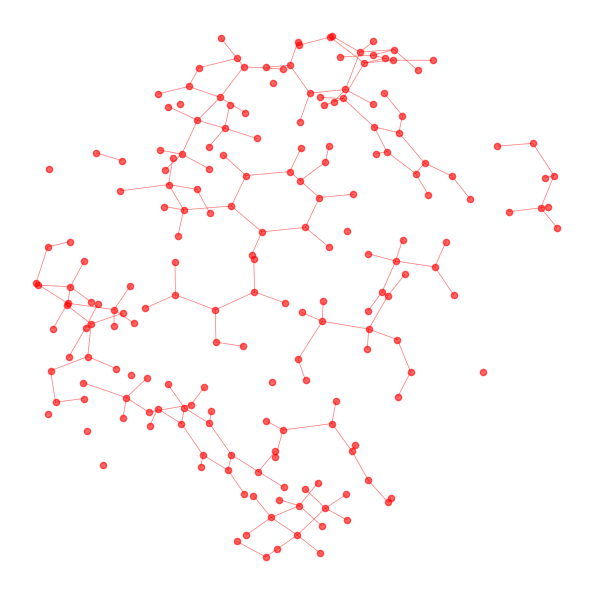

In [5]:
# Combined visualization
def plot_protein(protein_graph):
    """Plot both protein and ligand graphs together"""
    fig, ax = plt.subplots(figsize=(6, 6)) #figsize=(6.3, 2.6)
    
    # Get positions
    prot_pos = protein_graph.pos.numpy()
    
    # Plot protein edges
    prot_edge_index = protein_graph.edge_index.numpy()
    for i in range(prot_edge_index.shape[1]):
        start, end = prot_edge_index[:, i]
        #ax.plot([prot_pos[start, 0], prot_pos[end, 0]], 
        #        [prot_pos[start, 1], prot_pos[end, 1]], 
        #        'r-', alpha=0.3, linewidth=0.5)
        #ax2.plot([prot_pos[start, 0], prot_pos[end, 0]], 
        #        [prot_pos[start, 2], prot_pos[end, 2]], 
        #        'r-', alpha=0.3, linewidth=0.5)
        ax.plot([prot_pos[start, 1], prot_pos[end, 1]], 
                [prot_pos[start, 2], prot_pos[end, 2]], 
                'r-', alpha=0.3, linewidth=0.5)
    
    
    # Plot nodes
    #ax1.scatter(prot_pos[:, 0], prot_pos[:, 1], c='red', s=20, alpha=0.6, label='Protein')
    #ax1.scatter(lig_pos[:, 0], lig_pos[:, 1], c='blue', s=40, alpha=0.8, label='Ligand')
    #
    #ax2.scatter(prot_pos[:, 0], prot_pos[:, 2], c='red', s=20, alpha=0.6, label='Protein')
    #ax2.scatter(lig_pos[:, 0], lig_pos[:, 2], c='blue', s=40, alpha=0.8, label='Ligand')
    
    ax.scatter(prot_pos[:, 1], prot_pos[:, 2], c='red', s=20, alpha=0.6, label='Protein')
    
    # Labels and titles
    #ax1.set_xlabel('X')
    #ax1.set_ylabel('Y')
    #ax1.set_title(f'XY projection')
    #ax1.legend()
    
    #ax2.set_xlabel('X')
    #ax2.set_ylabel('Z')
    #ax2.set_title(f'XZ projection')
    #ax2.legend()
    
    #ax3.set_xlabel('Y')
    #ax3.set_ylabel('Z')
    #ax3.set_title(f'YZ projection')
    #ax3.legend()
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(bottom=False, left=False)   # removes tick marks too
    for spine in ax.spines.values():           # optional: hide the box
        spine.set_visible(False)
    plt.tight_layout()
    #plt.show()
    fig.savefig("graph_etnn_protein.pdf", bbox_inches="tight", facecolor="white")
    

print("Creating combined visualization...")
plot_protein(protein_graph)
